In [1]:
from IPython.display import Markdown, display
display(Markdown(open("./SM_header.md", "r").read()))

Copyright © 2025 Université Paris Cité

Author: [Guillaume Rousseau](https://www.linkedin.com/in/grouss/), Laboratoire Matières et Systèmes Complexes, UMR 7057, CNRS and Université Paris Cité, CNRS, UMR7057, 10 rue Alice Domon et Léonie Duquet, F-75013, Paris cedex 13, France (email: guillaume.rousseau@u-paris.fr)

This archive contains the supplemental materials and replication package associated with the preprint, "*Growth Regime Shifts in Empirical Networks: Evidence and Challenges from the Software Heritage and APS Citation Case Studies*", available on [arXiv](https://arxiv.org/abs/2501.10145) and [ssrn](http://ssrn.com/abstract=5191689).

**The latest version of the preprint (timestamped arXiv:2501.10145v4) is downloadable here https://arxiv.org/pdf/2501.10145**

The current version of the Python scripts and associated resources is available on the [author's GitHub page](https://github.com/grouss/growing-network-study).

This work is currently licensed under the [Creative Commons CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0).

To give appropriate credit and cite this work ([BibTeX entry](./rousseau2025temporal)):
Rousseau, G. (2025). *Growth Regime Shifts in Empirical Networks: Evidence and Challenges from the Software Heritage and APS Citation Case Studies* [Preprint]. arXiv:2501.10145. https://arxiv.org/abs/2501.10145; also available on SSRN: http://ssrn.com/abstract=5191689

 
# A) Replication Packages

[Open the Replication Package notebook related to the datasets.](./Replication_Package_Datasets.ipynb)

[Open the Replication Package notebook related to the figures.](./Replication_Package_Figures.ipynb)

# B) QuickStart Guide

[Open the QuickStart Guide notebook](./SM00_QuickStart.ipynb)

# C) Table of Contents

- 1. [Function Definitions](./SM01_Functions.ipynb)
- 2. [Dataset Import](./SM02_DatasetImport.ipynb)
- 3. [Building the Transposed Graph](./SM03_BuildingTransposedGraph.ipynb)
- 4. [Temporal Information Quality and Summary Statistics](./SM04_TemporalInformationMainStats.ipynb)
- 5. [Growth Relationship Between Nodes and Edges](./SM05_GrowingRules.ipynb)
- 6. [Topological Partitioning($RV$ Nodes)](./SM06_TopologicalPartitioning.ipynb)
- 7. [In-Degree and Out-Degree Distributions Over Time](./SM07_DegreeDistributionOverTime.ipynb)
- 8. [Distribution Tail Analysis](./SM08_DistributionTailAnalysis.ipynb)
- 9. [Temporal Partitioning](./SM09_TemporalPartitioning.ipynb)
- 10. [Derived $O-(RV/RL)-O$ Graph Construction](./SM10_DerivedGrowingNetwork.ipynb)
- 11. [Building the $TSL$ Partitioning](./SM11_TSLPartitioning.ipynb)
- 12. [Price / Directed Barabási–Albert Model Use Case](./SM12_BarabasiAlbertUseCase.ipynb)
- 13. [APS citation network](./SM13_APSCitationNetwork.ipynb)
- 14. [Generic Report Template](./SM14_GenericReport.ipynb)


**NB :** As of 2025/09/15, the QuickStart guide, the replication packages, and SM01 to SM14 are available. The Python scripts are also provided under `local_utils` directory, but they are not in their final form and should be considered an alpha release. 

The main graph datasets used in the study are available in a distinct Zenodo Deposit 10.5281/zenodo.15260640 ($\sim50$ Go), including the main dataset $O/RV/RL-O/RV/RL$ (2+ billions of nodes, $\sim4$ billions of edges), and two derived $O-(RV/RL)-O$ graphs ($\sim150$ millions nodes and edges).

The APS Citation Dataset (2022 export) has been included in the study.

More release notes are available in the [dedicated notebook](./SM_ReleaseNote.ipynb).

In [2]:
%load_ext autoreload
%autoreload 2

import importlib,sys,local_utils
from local_utils import *

print("___ Import data from graphpath=",config.graphpath)
print("___ Export data to exportpath=",config.exportpath)   

DisplayCopyrightInfo()


___ Import data from graphpath= ./ImportData/
___ Export data to exportpath= ./ExportData/
--------------------------------------------------------------------------------
Copyright 2025 Université Paris Cité, France 
Author: Guillaume Rousseau, MSC Lab, Physics Department, Paris, France 

(https://www.linkedin.com/in/grouss/)

This archive contains the supplemental materials and replication package associated with the preprint available on :
- arXiv (https://arxiv.org/abs/2501.10145)
- SSRN  (http://ssrn.com/abstract=5191689

Current version of python scripts and associated ressources are available on author's github page
(https://github.com/grouss/growing-network-study)

This work is currently licensed under CC BY-NC-SA 4.0
(https://creativecommons.org/licenses/by-nc-sa/4.0)
--------------------------------------------------------------------------------



# 10 Derived O-(RV/RL)-O Graph

## a) Building the Derived Graph

From the partitioning array $H$, defined previously, one can easily construct the derived graph, denoted $O-(RV/RL)-O$. This is a directed graph containing only $O$ nodes. There is a directed edge from the $O$ node of index $I_O$ to the $O$ node of index $I_O'$ if there exists at least one $RL$ or $RV$ node—resulting from the partitioning process—that is reachable by traversing the original graph starting from the $O$ node of index $I_O$, and that has been assigned to the $O$ node of index $I_O'$.

In the general case, the number of nodes reachable from $I_O$ and assigned to $I_O'$ can be used as an edge attribute (interpretable as a weight) for the edge $I_O-I_O'$.

This definition implies that $O$ nodes with at least one assigned $RV$ or $RL$ node will have a self-loop, i.e., an outgoing edge pointing to themselves.

**$O$ nodes that have at least one assigned $RL$ or $RV$ node can now be assigned a timestamp, which can, for example, be defined as the minimum of the timestamps of the $RV/RL$ nodes assigned to that $O$ node.** By convention, we assign a timestamp of $2^{32}-1$ to origins with no assigned nodes.

As discussed in the case of edges between $RV$ nodes, there is no guarantee that the source $O$ node has a timestamp earlier than that of the target $O$ node. This may have important consequences for the network's evolution rules, which we will address when relevant, although a systematic study of this phenomenon is left for future work.



In [3]:
# default LoadAllArray_OO() <=> LoadAllArray_OO(keypath="BigO") => derived graph with edge inheritance 
# LoadAllArray_OO(keypath="L0") => derived graph without edge inheritance 
# the Inheritance=False is mainly discussed in section 10.C
Inheritance=True
if Inheritance:
    InheritancePath="BigO"
    print("derived graph with edge inheritance")
else:
    print("derived graph without edge inheritance")
    InheritancePath="L0"

nodes_O,edges_O,nodesad_O,d,Nnodes_O,Nedges_O,EPOCH,DatasetName=LoadAllArray_OO(keypath=InheritancePath)

#print(nodesad_O.shape)
#print(np.sum(nodesad_O[:d["O"]]))

derived graph with edge inheritance
Loaded : nodes_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : edges_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : nodesadderived_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : ./ImportData/d_o_derived_O-RVRL-O_BigO_20240429.pkl
DatasetName SWH derived O-[RV/RL]-O
DatasetDescription Zenodo Deposit 10.5281/zenodo.15260640
DatasetDoi 10.5281/zenodo.15260640
From EPOCH 1970-01-01


In [24]:
Debug=False

In [25]:
if Debug and Inheritance:
    print("(!) The 2 files (~10Go) needed to perform this integrity check is not provided")
    print("_"*80)
    print("Integrity check (Only if Inhertiance==True (default))")
    print("."*80)
    Ncheck=1000
    count=0
    # we need both nodes_O, nodes, edges_O and edges
    nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArray()
    H=pickle.load(open(graphpath+"H_derived_O-RVRL-O_BigO_RV_ORI20240429_19800101_YYYYMMDD.pkl","rb"))
    l=np.random.randint(0,d["O"],Ncheck)
    for index in l:
        count+=1
        knownindexsetO=edges_O[nodes_O[index]:nodes_O[index+1]]
        knownindexset=set(H[list(GetNodesDescedants(index,nodes,edges))]) # All edges according to partitionning
        if len(knownindexset)!=len(knownindexsetO):
            # for debug only
            print("ERROR ",index,"O-RVRL-O",knownindexset,"O-O", knownindexsetO)
            break
        if count%(Ncheck//100)==0: print(count//(Ncheck//100),end=" ")
    print("(ok if 100/100% without error message)")
    print("_"*80)


________________________________________________________________________________
Integrity check (Only if Inhertiance==True (default))
................................................................................
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 (ok if 100/100% without error message)
________________________________________________________________________________


From this point onward, the derived graph $O-(RV/RL)-O$ is defined by three arrays: `nodes_O`, `edges_O`, and the timestamp array `nodesad_O`. It can now be analyzed as a graph in its own right, using the same methodology and tools as for the main graph.

**NB**: It is important to keep in mind that this graph—derived from a temporal partitioning based on the assignment of $RV$ and $RL$ nodes and their associated timestamps—is not unique. It may exhibit biases related to the specific rules used to construct it (see discussion in the article).


**Comment**: The following cells are essentially duplicates of the previous ones.

## b) Generic graph study with inheritance (*BigO* rule)

In [4]:
Inheritance=True
if Inheritance:
    InheritancePath="BigO"
    print("Derived graph with edge inheritance")
else:
    print("Derived graph without edge inheritance")
    InheritancePath="L0"

Derived graph with edge inheritance


In [5]:
nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArray_OO(keypath=InheritancePath)
statsoutput=DisplayTypeStats(nodes,edges,d)    

Loaded : nodes_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : edges_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : nodesadderived_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : ./ImportData/d_o_derived_O-RVRL-O_BigO_20240429.pkl
DatasetName SWH derived O-[RV/RL]-O
DatasetDescription Zenodo Deposit 10.5281/zenodo.15260640
DatasetDoi 10.5281/zenodo.15260640
From EPOCH 1970-01-01
GetNodesTypesArray [Elapse time : 1.0 (s)]
___ O     :     139,524,533 (100.0%)
____________________________________
___ Total :     139,524,533 (100.0%)

GetEdgesTypesArray [Elapse time : 1.0 (s)]
___ O>O   :     156,682,302 (100.0%)
____________________________________
___ Total :     156,682,302 (100.0%)



**Comment**: The derived graph without inheritance will be discuss later.

In [7]:
Rebuild=False
DisplayStat=True
Fsave=False


In [8]:
if Rebuild:
    # nodes creation over time (per type per month)
    stat={}
    ti=time.time()
    stat=BuildNodesTimeStampHisto(nodes,edges,nodesad,d,stat=stat)
    tf=time.time()
    print("BuildNodesTimeStampHisto Elapse ",np.round(tf-ti),"(s)")
    print(stat.keys())
    # BuildNodesTimeStampHisto Elapse  144.0
    # edges creation over time (per type per month)
    ti=time.time()
    stat=BuildEdgesTimeStampHisto(nodes,edges,nodesad,d,stat=stat,Verbose=True)
    tf=time.time()
    print("BuildEdgesTimeStampHisto Elapse ",np.round(tf-ti),"(s)")
    print(stat.keys())
    filename=exportpath+"stat_nodes_edges_O-O_"+InheritancePath+"_ORI_1970_2030_20241008.pkl"
    if Fsave:
        pickle.dump(stat,open(filename,"wb"))
        print("Saved in ",filename)
    else:
        print("NOT SAVED in ",filename)
        

InheritancePath BigO
LOAD  ./ExportData/stat_nodes_edges_O-O_BigO_ORI_1970_2030_20241008.pkl


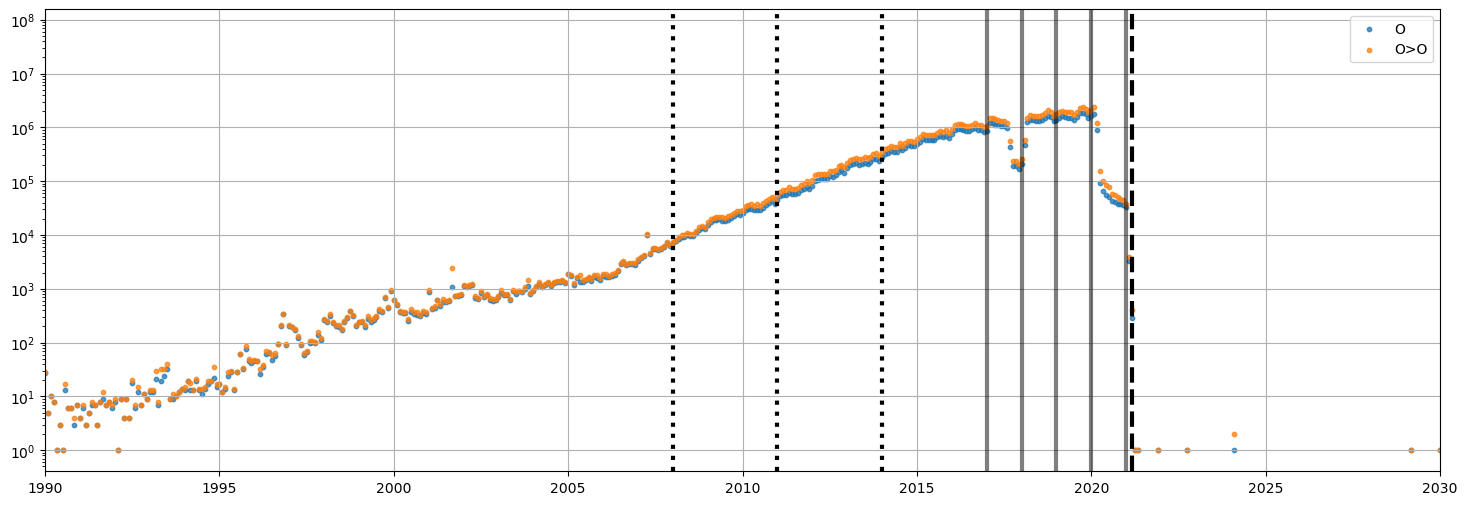

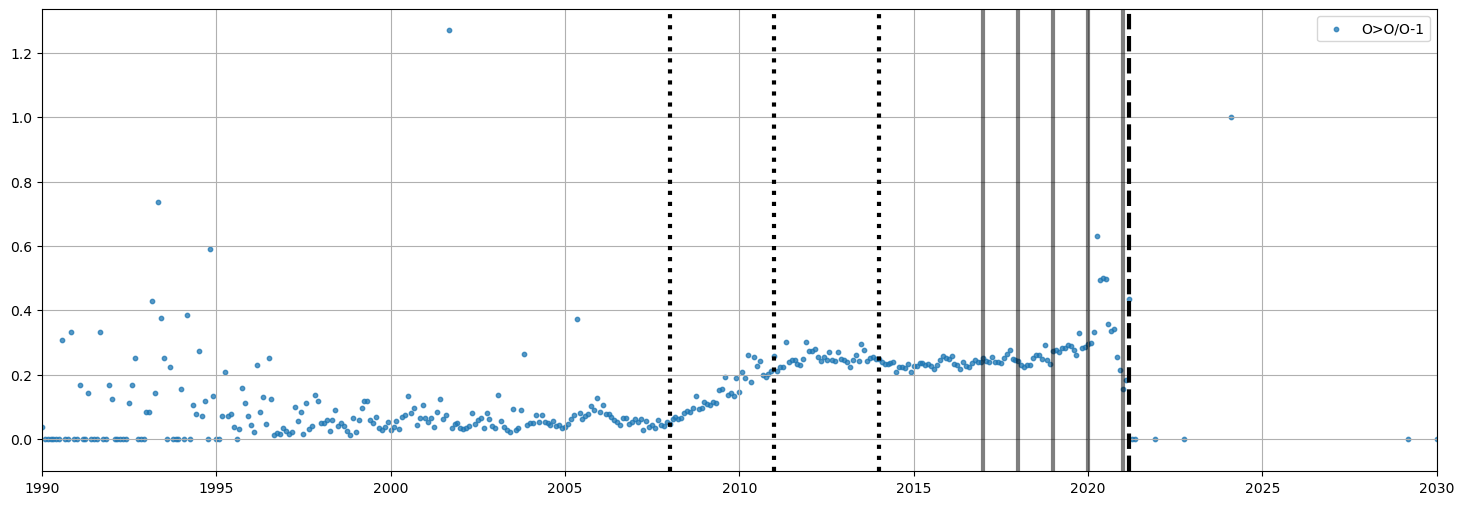

In [9]:
if DisplayStat:
    print("InheritancePath",InheritancePath)
    filename=exportpath+"stat_nodes_edges_O-O_"+InheritancePath+"_ORI_1970_2030_20241008.pkl"
    print("LOAD ",filename)
    stat=pickle.load(open(filename,"rb"))
    # displaying all curves
    x=np.arange(1634)/12+1970
    def VerticalLinesLocal():
        lw=3;alpha=0.5
        plt.xlim(1990,2030)
        for year in range(2017,2022):
            plt.axvline(x=year,color='k',alpha=alpha,lw=lw)
        plt.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
        for year in [2008,2011,2014]:
            plt.axvline(x=year,color='k',linestyle=':',alpha=1,lw=lw)
        plt.grid()
        plt.legend()
            
    plt.figure(figsize=(18,6))
    for key,value in stat.items():
        if np.sum(value[1:-1])!=0:
            plt.scatter(x,value,s=10,label=key,alpha=0.75)
    plt.yscale('log')
    VerticalLinesLocal()
    plt.show()
    
    plt.figure(figsize=(18,6))
    for key,value in stat.items():
        if np.sum(value[1:-1])!=0 and ">" in key:
            length=(len(key)-1)//2
            plt.scatter(x,value/stat[key[-length:]]-1,s=10,label=key+"/"+key[-length:]+"-1",alpha=0.75)
    VerticalLinesLocal()
    #plt.yscale('log')
    plt.show()

**Comment (With Inheritance)**: 
- The ratio of new edges to new nodes indicates regime changes in 2008, around 2011, and from 2014 onward.  
- The average number of nodes appears to vary almost linearly between 2008 and the end of 2011/2012.  
- Later, the behavior becomes less clear, likely showing a decrease initially, followed by an increase in the average number of edges per new node.  
- The partitioning used here allows, and indeed facilitates, edge inheritance. Specifically, an origin points to all other origins with which it shares a common revision, regardless of whether the path to the shared $RV/RL$ nodes passes through nodes assigned to other origins (see the discussion in the following SM).


In [12]:

if DisplayStat:
    # Exception Timestamp nodes per type
    arraytype,encoding=GetNodesTypesArray(nodes,edges,d)
    DisplayTimestampException(arraytype,encoding,nodesad,f'Nodes')
    
    print(f'_'*80)
    
    # edge source timestamp exception
    arraytype,encoding=GetEdgesTypesArray(nodes,edges,d)
    arrayTS=GetSourceEdgeTimeStamp(nodes,edges,nodesad,d)
    DisplayTimestampException(arraytype,encoding,arrayTS,f'Source Edges')
    
    print(f'_'*80)
    
    # edge target timestamp exception
    arraytype,encoding=GetEdgesTypesArray(nodes,edges,d)
    arrayTS=GetTargetEdgeTimeStamp(nodes,edges,nodesad,d)
    DisplayTimestampException(arraytype,encoding,arrayTS,f'Target Edges')
    
    #del nodes,edges,nodesad

Nodes        Timestamp Exceptions O     | Total=    139,524,533 | Zero(1970-01-01)=          1,384 | Ts(1970-01-01+2^32-1)=     63,601,527 |
________________________________________________________________________________
Source Edges Timestamp Exceptions O>O   | Total=    156,682,302 | Zero(1970-01-01)=          1,812 | Ts(1970-01-01+2^32-1)=     61,360,197 |
________________________________________________________________________________
Target Edges Timestamp Exceptions O>O   | Total=    156,682,302 | Zero(1970-01-01)=        155,293 | Ts(1970-01-01+2^32-1)=         28,287 |


--------------------------------------------------------------------------------
-------------------------- Exclduing SelfLoop ==  True -------------------------
--------------------------------------------------------------------------------
Edge Source/Target TS Building  2.25 (s)
!! Excluding SelfLoops
Mask Building  1.21 (s)
19,371,903 valid edges over a total of 156,682,302 i.e. 12.36 % of valid edges
Unvalid edges are mainly orgin nodes without release or revision nodes after partitioning for which nodesad=2^32-1
Building DeltaTS  0.57 (s)
Applying Mask  0.12 (s)
Building edge type array and applying mask 0.4 (s)
Start for edge type : O>O


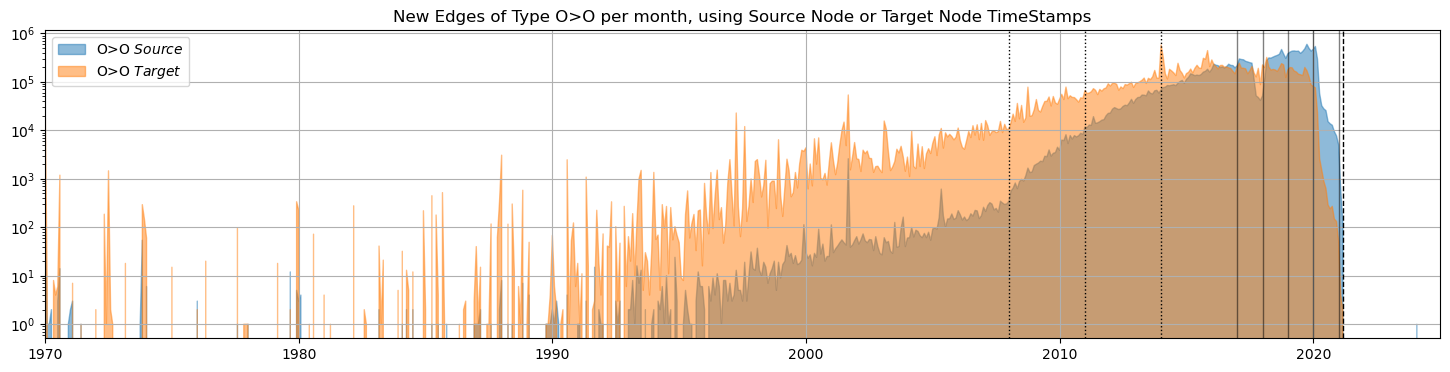

!! Excluding SelfLoops
             TS <= -10 Years           1,398 i.e   0.01 %
-10 Years <  TS <= - 1 Year           78,240 i.e   0.40 %
- 1 Year  <  TS <= - 1 Month         130,389 i.e   0.67 %
- 1 Month <  TS <= - 1 Week           51,310 i.e   0.26 %
- 1 Week  <  TS <= - 1 Day            38,572 i.e   0.20 %
- 1 Day   <  TS <= - 1 Hour           21,000 i.e   0.11 %
- 1 Hour  <  TS <= - 1 Mn              8,033 i.e   0.04 %
- 1 Mn    <  TS <= - 1 S               2,027 i.e   0.01 %
................................................................................
O>O     Total TS <  0 S (negative)         330,969 i.e   1.71 %
................................................................................
O>O     ***** TS == 0 S (null)              54,134 i.e   0.28 %
................................................................................
O>O     Total TS >  0 S (positive)      18,986,800 i.e  98.01 %
..............................................................................

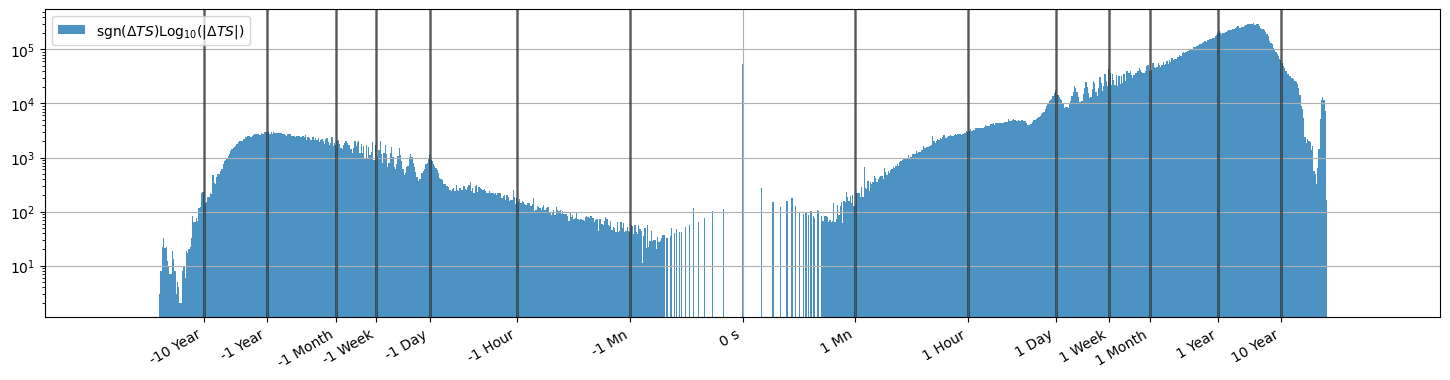

End for edge type : O>O
--------------------------------------------------------------------------------
-------------------------- Exclduing SelfLoop ==  False -------------------------
--------------------------------------------------------------------------------
Edge Source/Target TS Building  2.24 (s)
Mask Building  0.19 (s)
95,293,525 valid edges over a total of 156,682,302 i.e. 60.82 % of valid edges
Unvalid edges are mainly orgin nodes without release or revision nodes after partitioning for which nodesad=2^32-1
Building DeltaTS  1.36 (s)
Applying Mask  1.33 (s)
Building edge type array and applying mask 0.72 (s)
Start for edge type : O>O


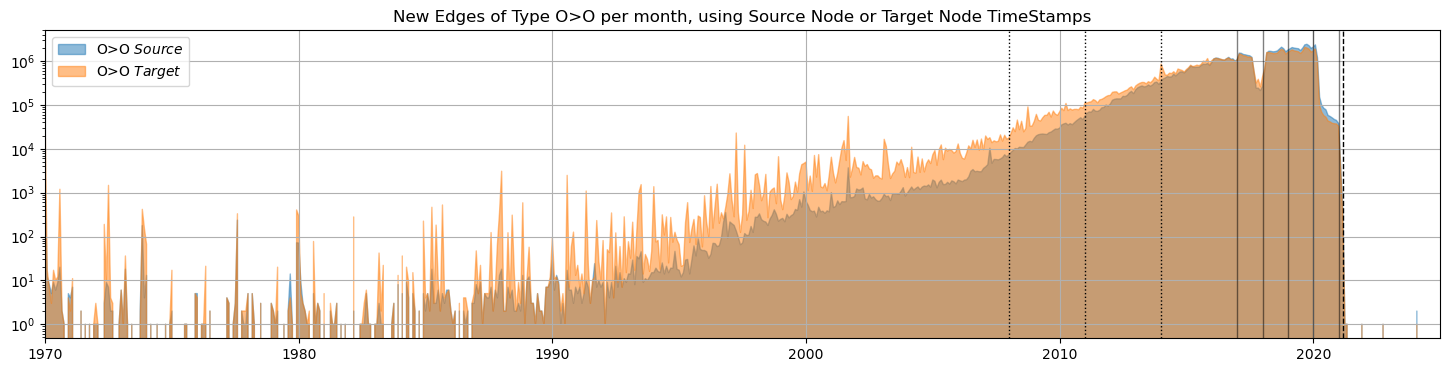

             TS <= -10 Years           1,398 i.e   0.00 %
-10 Years <  TS <= - 1 Year           78,240 i.e   0.08 %
- 1 Year  <  TS <= - 1 Month         130,389 i.e   0.14 %
- 1 Month <  TS <= - 1 Week           51,310 i.e   0.05 %
- 1 Week  <  TS <= - 1 Day            38,572 i.e   0.04 %
- 1 Day   <  TS <= - 1 Hour           21,000 i.e   0.02 %
- 1 Hour  <  TS <= - 1 Mn              8,033 i.e   0.01 %
- 1 Mn    <  TS <= - 1 S               2,027 i.e   0.00 %
................................................................................
O>O     Total TS <  0 S (negative)         330,969 i.e   0.35 %
................................................................................
O>O     ***** TS == 0 S (null)          75,975,756 i.e  79.73 %
................................................................................
O>O     Total TS >  0 S (positive)      18,986,800 i.e  19.92 %
................................................................................
  1 S     <= TS <   

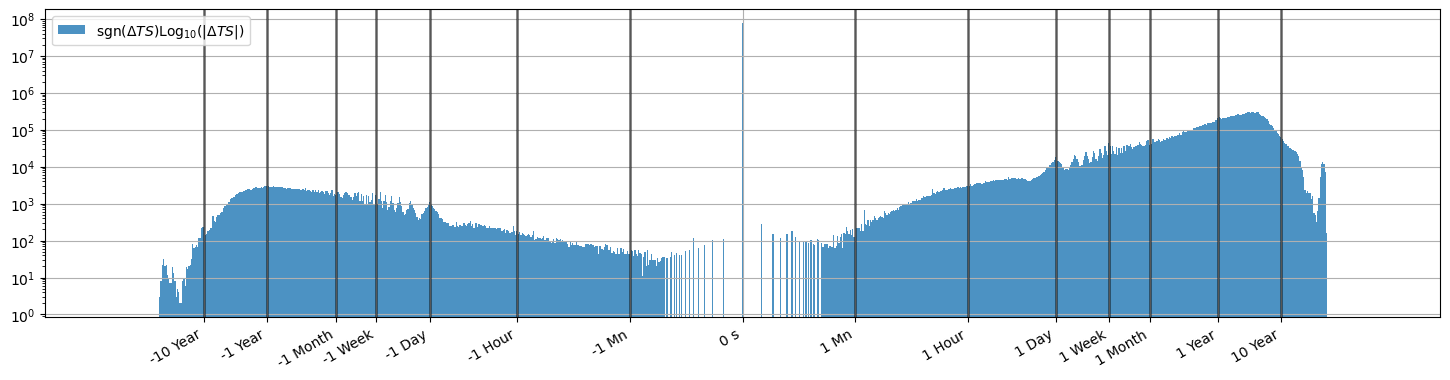

End for edge type : O>O


In [14]:
if DisplayStat:
    for ExcludingSelfLoop in [True,False]:  
        print(80*"-")
        print(26*"-","Exclduing SelfLoop == ",ExcludingSelfLoop,25*"-")
        print(80*"-")
        ti=time.time()
        sourcearrayTS=GetSourceEdgeTimeStamp(nodes,edges,nodesad,d)
        targetarrayTS=GetTargetEdgeTimeStamp(nodes,edges,nodesad,d)
        tf=time.time()
        print("Edge Source/Target TS Building ",np.round(tf-ti,2),"(s)")
        # we exclude edges where timestamp==0 or timestamp==2**32-1
        ti=time.time()
        mask=np.logical_and(np.logical_and(sourcearrayTS!=0,sourcearrayTS!=2**32-1),np.logical_and(targetarrayTS!=0,targetarrayTS!=2**32-1))
        if ExcludingSelfLoop :
            print("!! Excluding SelfLoops")
            sourceEdges=GetSourceEdge(nodes)
            mask=np.logical_and(mask,sourceEdges!=edges)
        tf=time.time()
        print("Mask Building ",np.round(tf-ti,2),"(s)")
        valid_edges=np.sum(mask)
        print(f'{valid_edges:,} valid edges over a total of {edges.shape[0]:,} i.e. {np.round(valid_edges/edges.shape[0]*100,2)} % of valid edges')
        print('Unvalid edges are mainly orgin nodes without release or revision nodes after partitioning for which nodesad=2^32-1')
        # ! Timestamp are uint32 (must convert to int before diff)
        # deltaTS still in second (negative or positive)
        ti=time.time()
        sourcearrayTS=sourcearrayTS[mask]
        targetarrayTS=targetarrayTS[mask]
        deltaTS=sourcearrayTS.astype('int')-targetarrayTS.astype('int')
        tf=time.time()
        print("Building DeltaTS ",np.round(tf-ti,2),"(s)")
        # convert s since EPOCH to Months since EPOCH
        ti=time.time()
        sourcearrayTS=timestampsarray2yearmonth(sourcearrayTS)
        targetarrayTS=timestampsarray2yearmonth(targetarrayTS)
        tf=time.time()
        print("Applying Mask ",np.round(tf-ti,2),"(s)")
        ti=time.time()
        arraytype,encoding=GetEdgesTypesArray(nodes,edges,d)
        arraytype=arraytype[mask]
        tf=time.time()
        print("Building edge type array and applying mask",np.round(tf-ti,2),"(s)")
        for i,Etype in enumerate(encoding):
            mask_type=arraytype==i
            
            if np.sum(mask_type)!=0:
                print("Start for edge type :",Etype)
                PlotTSoverTimeEdges(sourcearrayTS[mask_type],targetarrayTS[mask_type],Etype)
                if ExcludingSelfLoop :
                        print("!! Excluding SelfLoops")
                DisplayTSstat(deltaTS[mask_type],Etype)
                PlotTSHisto(deltaTS[mask_type],Etype)
                

**comment**: 

- Anomalies at the end of 2017 and 15 months before export, suggest bias due to SWH crawling policies, and lot of *missing* origins in this export (ie origin that probably already existed but was not yet crawled by the SWH crawler). If this can be easily understood for the months before the export date, it is more surprising for the anomaly at the end of 2017/begining of 2018.
- `O>O ***** TS == 0 S (null) 75,975,756 i.e  79.73 %` mainly correspond to selfloop edges (see below)
- If we exclude these self-loops, slightly less than 2% (0.35/19.92) of the remaining edges have a source with a timestamp earlier than the target's timestamp. A link can be created to a node that does not yet exist at the time the source node appears. Provided this makes sense and is not merely a bias from the chosen partitioning, this could be interpreted as the appearance of a link between two existing nodes at a date no earlier than the maximum of their respective timestamps. The analysis can then choose to orient the edges based on the arrow of time or retain the order induced by the partitioning.
- The existence of these particular edges, on the one hand, and the histogram of the "ages" of the edges, on the other hand, are important characteristics of the network's dynamics.


./ExportData/stat_nodes_edges_O-O_BigO_ORI_1970_2030_20241008.pkl


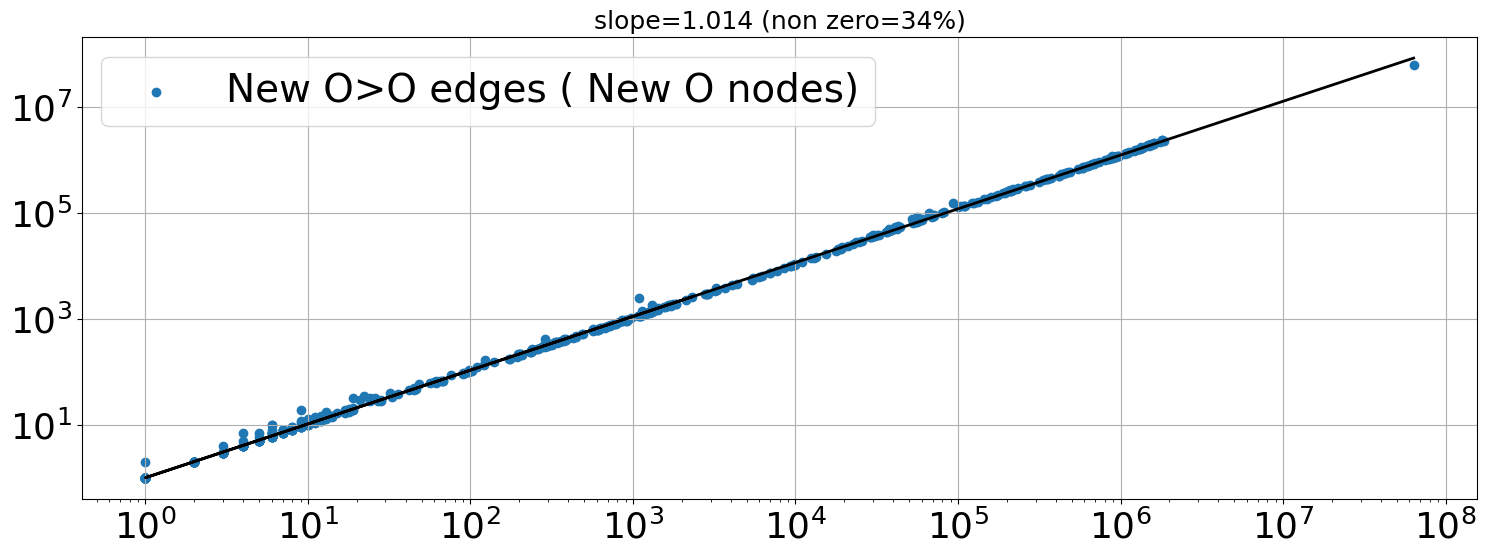

In [15]:
if DisplayStat:
    filename=exportpath+"stat_nodes_edges_O-O_"+InheritancePath+"_ORI_1970_2030_20241008.pkl"
    print(filename)
    stat=pickle.load(open(filename,"rb"))
    nfig=1
    
    fontsize=FontSize[nfig]
    
    
    #fig, axs = plt.subplots(nfig,2,figsize=(18,6*nfig),sharex=False,sharey=False)   
    plt.figure(figsize=(18,6*nfig))   
    
    col="O"
    row="O>O"
    x=stat[col]
    y=stat[row]
    mask=np.logical_and(x>0,y>0) # only for months with at least one new node and one new edge
    params, params_covariance = curve_fit(power_law, x[mask],np.log(y[mask]),p0=[1, 1])
    
    plt.scatter(x[mask],y[mask],label="New "+row+" edges ( New "+col+" nodes)")
    plt.plot(x[mask],np.exp(power_law(x[mask], *params)),color="k",lw=2)
    plt.title("slope="+str(round(params[1],3))+" (non zero="+str(round(100*np.sum(mask)/len(mask)))+"%)",fontsize=fontsize-10)
    plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.legend(fontsize=fontsize)
    plt.tick_params(axis='both',which='major',labelsize=fontsize-2)
    
    
    plt.show()

**Comment**:  
This figure confirms the overall linear relationship between the number of new edges and the number of new nodes. However, as previously noted, this may mask finer variations that are difficult to detect on a logarithmic scale.


In [19]:
Rebuild=True
Fsave=Rebuild
DisplayStat=True
Inheritance=False

if Inheritance:
    InheritancePath="BigO"
    print("Derived graph with edge inheritance")
else:
    print("Derived graph without edge inheritance")
    InheritancePath="L0"

Derived graph without edge inheritance


In [20]:
if Rebuild:
    nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArray_OO(keypath=InheritancePath)
    # not optimal, but just a copy paste of previous cells
    ti=time.time()
    Edgestype,Edgesencoding=GetEdgesTypesArray(nodes,edges,d)
    Nodestype,Nodesencoding=GetNodesTypesArray(nodes,edges,d)
    tf=time.time()
    print("Node and Edge Type Building ",np.round(tf-ti,2),"(s)")
    ti=time.time()
    sourceedges=GetSourceEdge(nodes,Nedges)
    sourceType=Nodestype[sourceedges]
    sourceTSY=timestampsarray2yearmonth(GetSourceEdgeTimeStamp(nodes,edges,nodesad,d))//12 # up to the end of the year
    tf=time.time()
    print("Source Type and TimesTamp Building elapse : ",np.round(tf-ti,2),"(s)")
    ti=time.time()
    targetType=Nodestype[edges]
    targetTSY=timestampsarray2yearmonth(GetTargetEdgeTimeStamp(nodes,edges,nodesad,d))//12 # up to the end of the year
    tf=time.time()
    print("Target Type and TimesTamp Building elapse : ",np.round(tf-ti,2),"(s)")
    dout={}
    din={}
    
    # we take into account "true time"
    TSY=np.maximum(sourceTSY,targetTSY)
    GetAllTypesDegreeStats(sourceedges,edges,TSY,dout,din,Nnodes)    
    GetPerTypesDegreeStats(sourceedges,edges,TSY,Edgestype,Edgesencoding,dout,din,Nnodes,PerFlag="EDGE")   
    GetPerTypesDegreeStats(sourceedges,edges,TSY,Edgestype,Edgesencoding,dout,din,Nnodes,PerFlag="SOURCE")  
    GetPerTypesDegreeStats(sourceedges,edges,TSY,Edgestype,Edgesencoding,dout,din,Nnodes,PerFlag="TARGET")   
    if Fsave:
        filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_year_1980_2025_20250524.pkl"
        pickle.dump((dout,din),open(filename,"wb"))
        print("SAVED ",filename)

In [21]:
## Fix small bug causing a slight shift in stats when degree == 0 (no impact on results)
#version="20241008"
version="20250524" 
#filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_year_1980_2025_20241008.pkl"
filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_year_1980_2025_"+version+".pkl"
dout,din=pickle.load(open(filename,"rb"))
print(din.keys())
for key in din.keys():
    if din['O>O'][3000]["ccdf"][0]!=dout['O>O'][3000]["ccdf"][0]:
        print("ERROR",key,"0!=",din['O>O'][3000]["ccdf"][0]-dout['O>O'][3000]["ccdf"][0])

dict_keys(['All types', 'O>O', 'O>', '>O'])


### In-degree distribution over years

dout.keys() dict_keys(['All types', 'O>O', 'O>', '>O'])
din.keys()  dict_keys(['All types', 'O>O', 'O>', '>O'])
--------------------------------------------------------------------------------


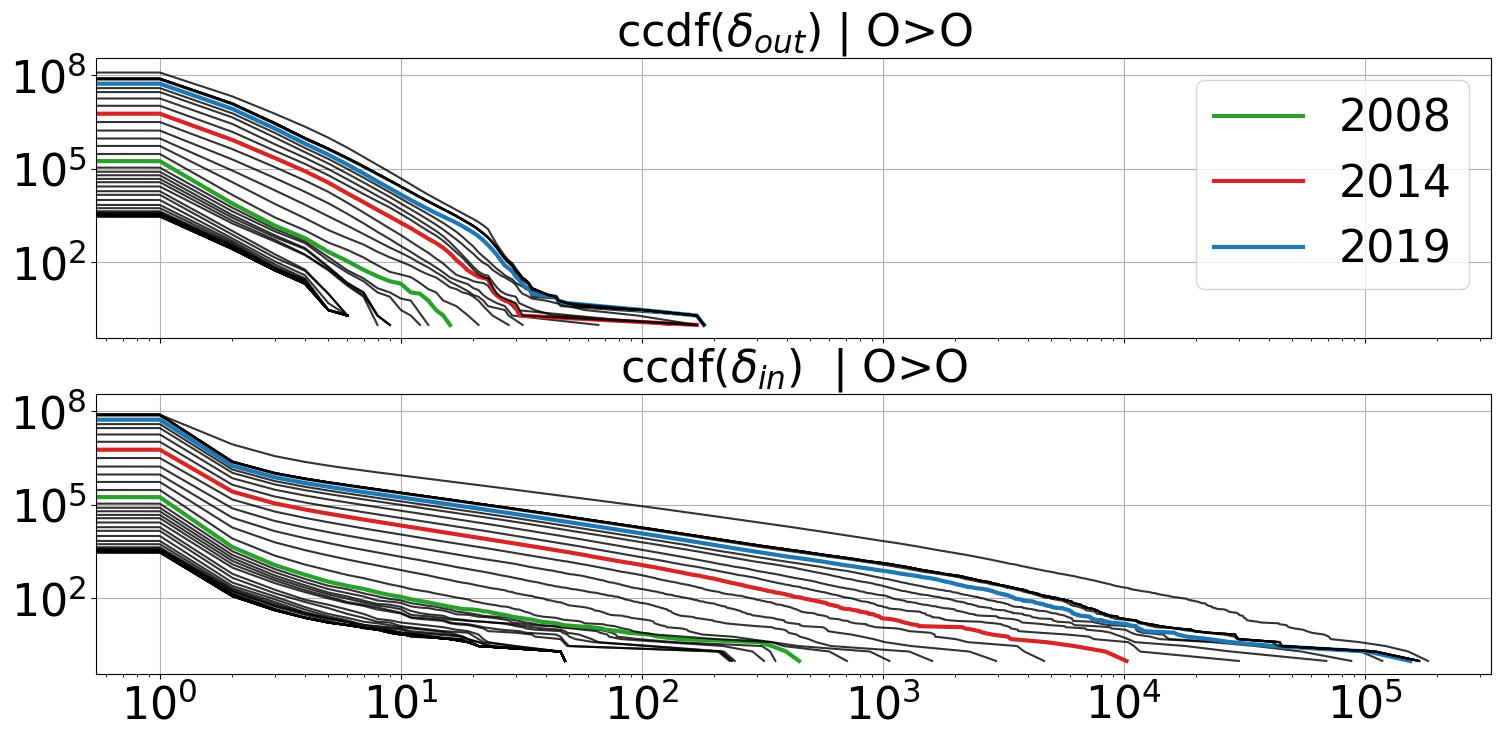

In [25]:
if DisplayStat:
    #version="20241008"
    version="20250524" # Fix small bug causing a slight shift in stats when degree == 0 (no impact on results)
    #filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_year_1980_2025_20241008.pkl"
    filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_year_1980_2025_"+version+".pkl"
    dout,din=pickle.load(open(filename,"rb"))
    print("dout.keys()",dout.keys())
    print("din.keys() ",din.keys())
    nfig=2
    fontsize=FontSize[nfig]
    
    # ccdf or df
    if True:
        field,key=('ccdf',"ccdf")
    else:
        field,key=('y',"df")
    
    
    YearList=[2008,2014,2019]
    ColorList=["tab:green","tab:red","tab:blue"]
    #for s in dout.keys():
    for s in ["O>O"]:
        # ONLY FOCUS on "O>O", others are the same
        print("-"*80)
        #print(s)
        fig, axs = plt.subplots(nfig,figsize=(18,4*nfig),sharex=True)   
        #plt.tight_layout()
        for i in [0,1]:
            axs[i].grid()
            axs[i].set_yscale("log")
            axs[i].set_xscale("log")
            axs[i].tick_params(axis='both',which='major',labelsize=FontSize[nfig])
            
        for year in dout[s].keys():
            if year in YearList:
                c=ColorList[np.where(np.array(YearList)==year)[0][0]]
            
                axs[0].plot(dout[s][year]["x"],dout[s][year][key],markersize=0.5,c=c,lw=3,label=str(year))
                axs[1].plot(din[s][year]["x"],din[s][year][key],markersize=0.5,c=c,lw=3,label=str(year))
    
            else:
                axs[0].plot(dout[s][year]["x"],dout[s][year][key],markersize=0.5,c="k",alpha=0.8)
                axs[1].plot(din[s][year]["x"],din[s][year][key],markersize=0.5,c="k",alpha=0.8)
        axs[1].set_title(field+r'$(\delta_{in})$  | '+s,fontsize=fontsize)
        axs[0].set_title(field+r'$(\delta_{out})$ | '+s,fontsize=fontsize)
        axs[0].legend(loc='upper right',fontsize=fontsize,ncol=1,markerscale=2)
        plt.show()

**Comment**:  
- The distributions are much more regular than those observed in the $RV>RV$ subnetwork histograms. In particular, there are fewer outliers.
- The distribution of outdegrees remains non-trivial compared to the assumptions commonly made in many minimal models. This is related to the earlier discussion on edge inheritance induced by the chosen partitioning scheme.


### In-degree tail distribution analysis

yearlist [2019] InheritancePath BigO WKS weightedKS RemoveSelfLoop True
________________________________________________________________________________
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX O>O XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
................................................................................


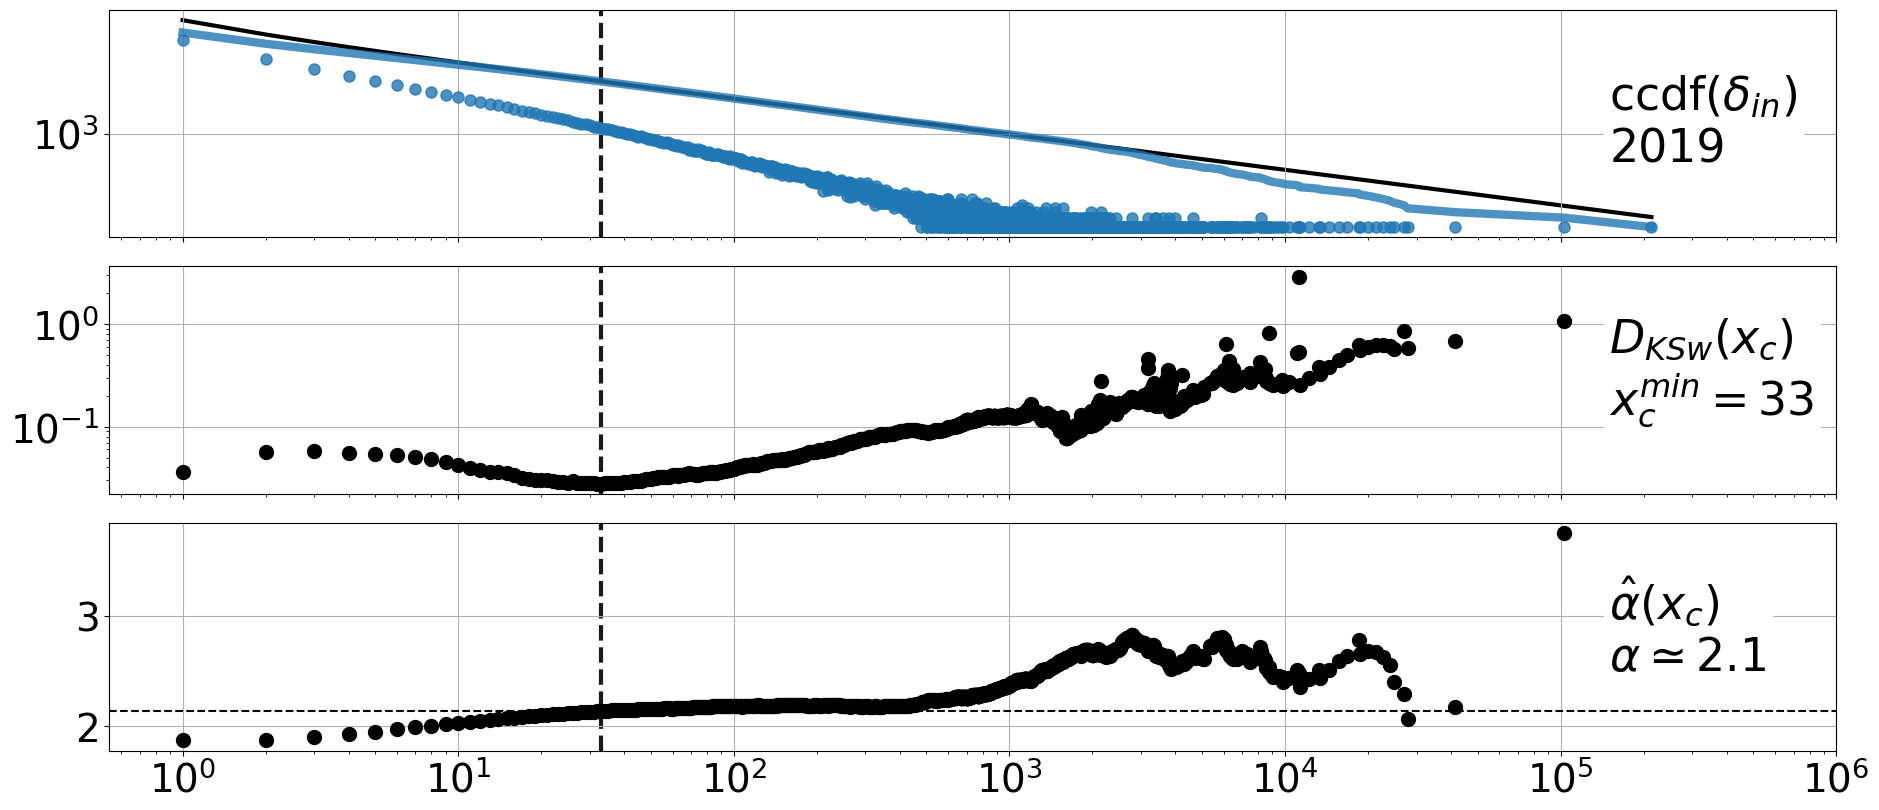

________________________________________________________________________________
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX RV>RV (for comparison) XXXXXXXXXXXXXXXX
................................................................................


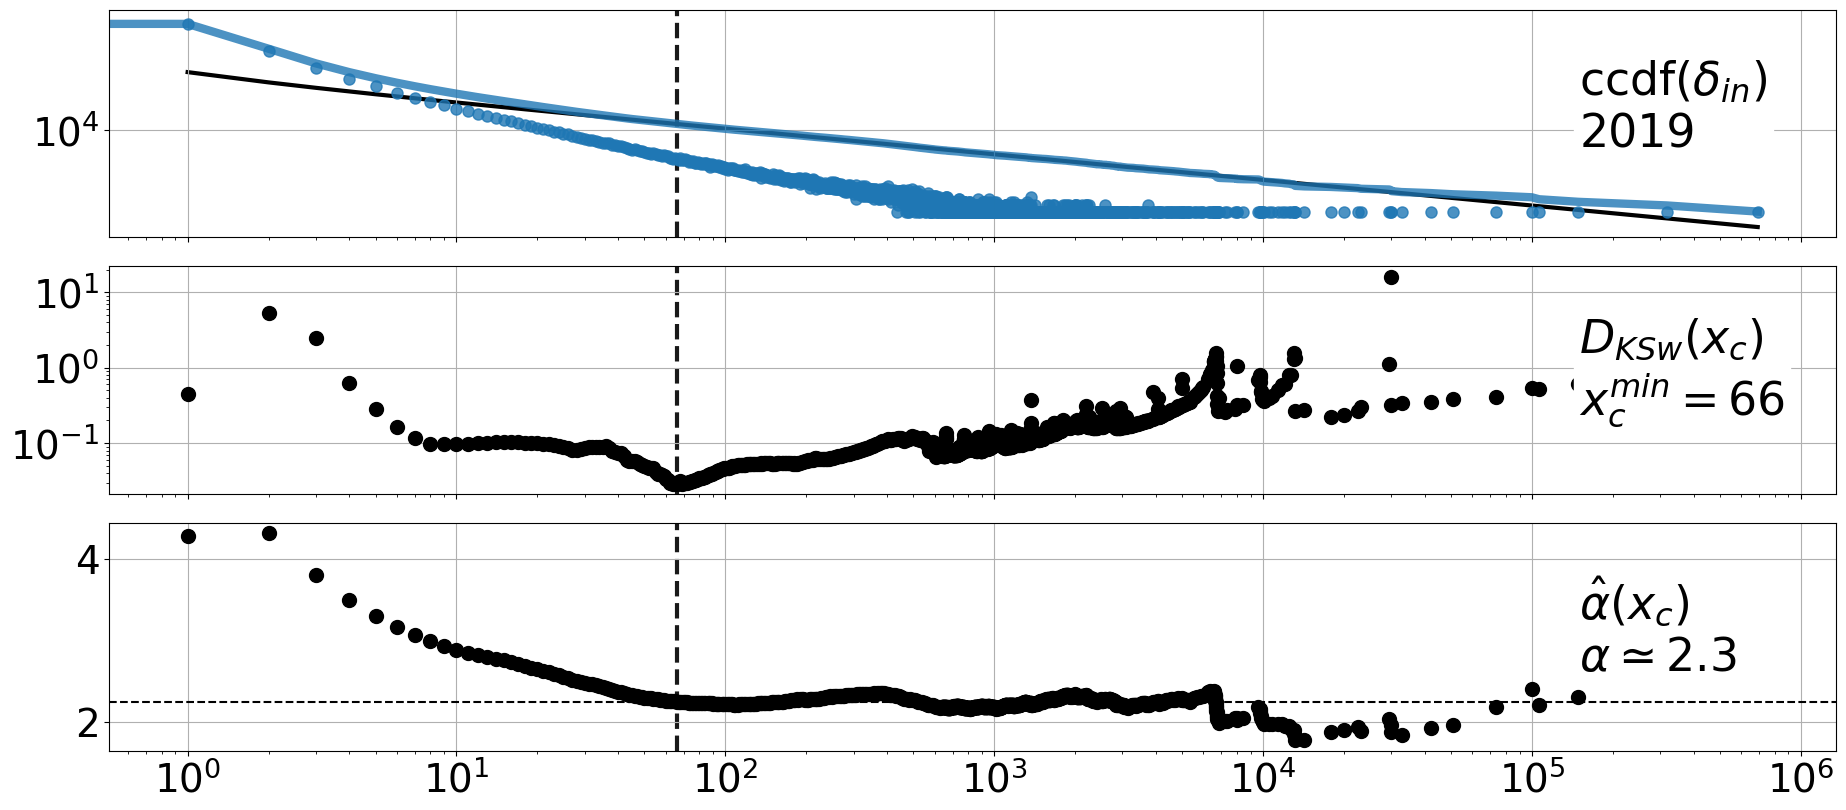

In [27]:
InheritancePath="BigO" # BigO or L0
WKS="weightedKS" # KS, weightedKS, Kuiper
XCmin=6
DisplayStat=True
RemoveSelfLoop=True
yearlist=[2019]
print("yearlist",yearlist,"InheritancePath",InheritancePath,"WKS",WKS,"RemoveSelfLoop",RemoveSelfLoop)
if DisplayStat:
    # comparison  beteween "O>O" and "RV>RV" using Clauset et al. 2009
    for filename,case,sentence in [
        (exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_year_1980_2025_20250524.pkl","O>O","O>O"),
        (exportpath+"degreeInOutHisto_TT_year_1980_2025_20240924.pkl","RV>RV","RV>RV (for comparison)"),
        ]:
        dout,din=pickle.load(open(filename,"rb"))
        print("_"*80)
        print("X"*40,sentence,"X"*(40-2-len(sentence)))
        print("."*80)
        for year in yearlist:
            x=din[case][year]["x"]
            y=din[case][year]["y"]
            ccdf=din[case][year]["ccdf"]
            if RemoveSelfLoop and case=="O>O":
                # remove selfloop
                #print(x[:10],x[-10:])
                #print(y[:10],y[-10:])
                #print("Before",np.sum(x*y))
                x=x[2:]-1 # shift x=0 and -1 for selfloop
                y=y[2:]
                #print("After",np.sum(x*y))
                #print(x[:10],x[-10:])
                #print(y[:10],y[-10:])
                ccdf=np.cumsum(y[::-1])[::-1]
                #print(ccdf[0],ccdf[-1])
                
            Plot_Figure_Degree(x,y,ccdf,year=year,filename="NONE",height=4,WKS=WKS,XCmin=XCmin)
        


**Comment**:

While not disregarding the limitations of the method used—recall that it assumes the existence of a scale-invariant regime for high-degree values from the outset, and its sensitivity to outliers remains an open question—the key observation is that the power law obtained for nearly the same cutoff value $x_c^{min} \simeq 50$ is much more consistent for low-degree values in the derived graph $O-(RV/RL)-O$ than in the subgraph $RV-RV$.

However, this may not necessarily be significant, as in most minimal models, the behavior of distributions for low-degree values is not a pure power lowa distribution (see SM12, which presents the same measurements applied to the Barabási-Albert model).

On the other hand, the exponent measured near the optimal cutoff value (as determined by the method) is almost constant in the derived network $O-(RV/RL)-O$, whereas significant variations can be observed in the subnetwork $RV-RV$ (e.g., near $x_c \simeq 400$ and $x_c \simeq 2000$, see SM08).

At this stage, and within the limitations previously discussed, we can reasonably conclude that the measurement is more reliable for the derived network $O-(RV/RL)-O$, as the obtained value is less sensitive to the choice of cutoff and, consequently, less affected by the ad hoc criterion used to define it.

### Scaling factor over months

In [ ]:
if Rebuild :
    # not optimal but copy paste of previous cell
    print("InheritancePath",InheritancePath)
    nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArray_OO(keypath=InheritancePath)
    Edgestype,Edgesencoding=GetEdgesTypesArray(nodes,edges,d)
    Nodestype,Nodesencoding=GetNodesTypesArray(nodes,edges,d)
    
    ti=time.time()
    sourceedges=GetSourceEdge(nodes,Nedges)
    sourceType=Nodestype[sourceedges]
    sourceTSM=timestampsarray2yearmonth(GetSourceEdgeTimeStamp(nodes,edges,nodesad,d))
    tf=time.time()
    print("Source Type and TimesTamp Building elapse : ",np.round(tf-ti,2),"(s)")
    ti=time.time()
    targetType=Nodestype[edges]
    targetTSM=timestampsarray2yearmonth(GetTargetEdgeTimeStamp(nodes,edges,nodesad,d))
    tf=time.time()
    print("Target Type and TimesTamp Building elapse : ",np.round(tf-ti,2),"(s)")
    
    #sourceTSM[:nodes[d["OindexMax"]+1]]=targetTSM[:nodes[d["OindexMax"]+1]]
    
    TSM=np.maximum(sourceTSM,targetTSM)
    del sourceTSM,targetTSM
    dout={}
    din={}
    # permute edges to swith to TT
    # can update timestamp and/or source/target
    # here only TT (no perutation of source and target)
    #GetAllTypesDegreeStats(sourceedges,edges,TSY,dout,din)    
    GetPerTypesDegreeStats(sourceedges,edges,None,Edgestype,Edgesencoding,dout,din,Nnodes,PerFlag="EDGE",FlagMonth=True,TSM=TSM)   
    #GetPerTypesDegreeStats(sourceedges,edges,TSY,Edgestype,Edgesencoding,dout,din,PerFlag="TARGET")   
    #GetPerTypesDegreeStats(sourceedges,edges,TSY,Edgestype,Edgesencoding,dout,din,PerFlag="SOURCE")  
    if Fsave:
        filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_Month_1980_2025_20241008.pkl"
        pickle.dump((dout,din),open(filename,"wb"))
        print("SAVED ",filename)


In [321]:
if Debug:
    print("_"*80)
    print("Integrity check (month vs year) InheritancePath=",InheritancePath)
    print("."*80)
    filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_Month_1980_2025_20241008.pkl"
    doutmonth,dinmonth=pickle.load(open(filename,"rb"))
    filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_year_1980_2025_20241008.pkl"
    doutyear,dinyear=pickle.load(open(filename,"rb"))
    
    for year in range(1980,2025):
        
        xy=dinyear["O>O"][year]["x"]
        yy=dinyear["O>O"][year]["y"]
        xm=dinmonth["O>O"][year*12]["x"]
        ym=dinmonth["O>O"][year*12]["y"]
        if np.sum(yy)!=np.sum(ym) or np.sum(yy*xy)!=np.sum(ym*xm):
            print("ERROR")
        print(year,end=" ")
    print("(ok if no error message)")
    
    print("_"*80)


________________________________________________________________________________
Integrity check (month vs year)
................................................................................
1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 (ok if no error message)
________________________________________________________________________________


In [15]:

if Rebuild:
    WKS="weightedKS" # weightedKS, KS, shiftedKS
    XCmin=6
    RemoveSelfLoop=True
    print(InheritancePath)
    filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_Month_1980_2025_20241008.pkl"
    dout,din=pickle.load(open(filename,"rb"))
    print("LOAD ",filename)
    print(dout.keys(),din.keys())
    xdate=[]
    x_min=[]
    e_x_min=[]
    D_max=[]
    Nnodes=[]
    Nedges=[]
    #plt.figure()
    for year in range(1980,2022,1):
        for month in range(0,12):
            if True:
                x=din["O>O"][year*12+month]["x"]
                y=din["O>O"][year*12+month]["y"]
                yc=din["O>O"][year*12+month]["ccdf"]
                if RemoveSelfLoop:
                    # remove selfloop
                    x=x[2:]-1 # shift x=0, x=1 and -1 for selfloop
                    y=y[2:]
                    yc=np.cumsum(y[::-1])[::-1]
                yfit,xfit,imin,x_min_shift,e_x_min_shift,D_max_shift=Get_yfit_yc_y_x(x,y,yc,Fall=True,WKS=WKS,XCmin=XCmin)
                xdate.append(year+(month-1)/12) # -1 XXX
                x_min.append(x_min_shift[imin])
                e_x_min.append(e_x_min_shift[imin])
                D_max.append(D_max_shift[imin])
                Nnodes.append(y)
                Nedges.append(x*y)
            else:
                #print("missing",year,month)
                pass
        print(year,x_min[-1],end=" ")
    
    if Fsave:
        filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_Month_1980_2025_20241008."+WKS+"_"+str(XCmin)+"_SL_"+str(RemoveSelfLoop)+".ehat.pkl"
        pickle.dump((xdate,x_min,e_x_min,D_max,Nnodes,Nedges),open(filename,"wb"))

BigO
LOAD  ./Data/degreeInOutHisto_TT_O-O_BigO_Month_1980_2025_20241008.pkl
dict_keys(['O>O']) dict_keys(['O>O'])
1980 7 1981 7 1982 7 1983 7 1984 7 1985 7 1986 7 1987 7 1988 7 1989 7 1990 7 1991 7 1992 7 1993 7 1994 6 1995 6 1996 6 1997 6 1998 6 1999 6 2000 6 2001 6 2002 6 2003 6 2004 6 2005 6 2006 9 2007 8 2008 6 2009 9 2010 19 2011 46 2012 48 2013 48 2014 47 2015 85 2016 39 2017 37 2018 33 2019 19 2020 18 2021 18 

weightedKS weightedKS XCmin>= 6
RemoveSelfLoop True
InheritancePath BigO


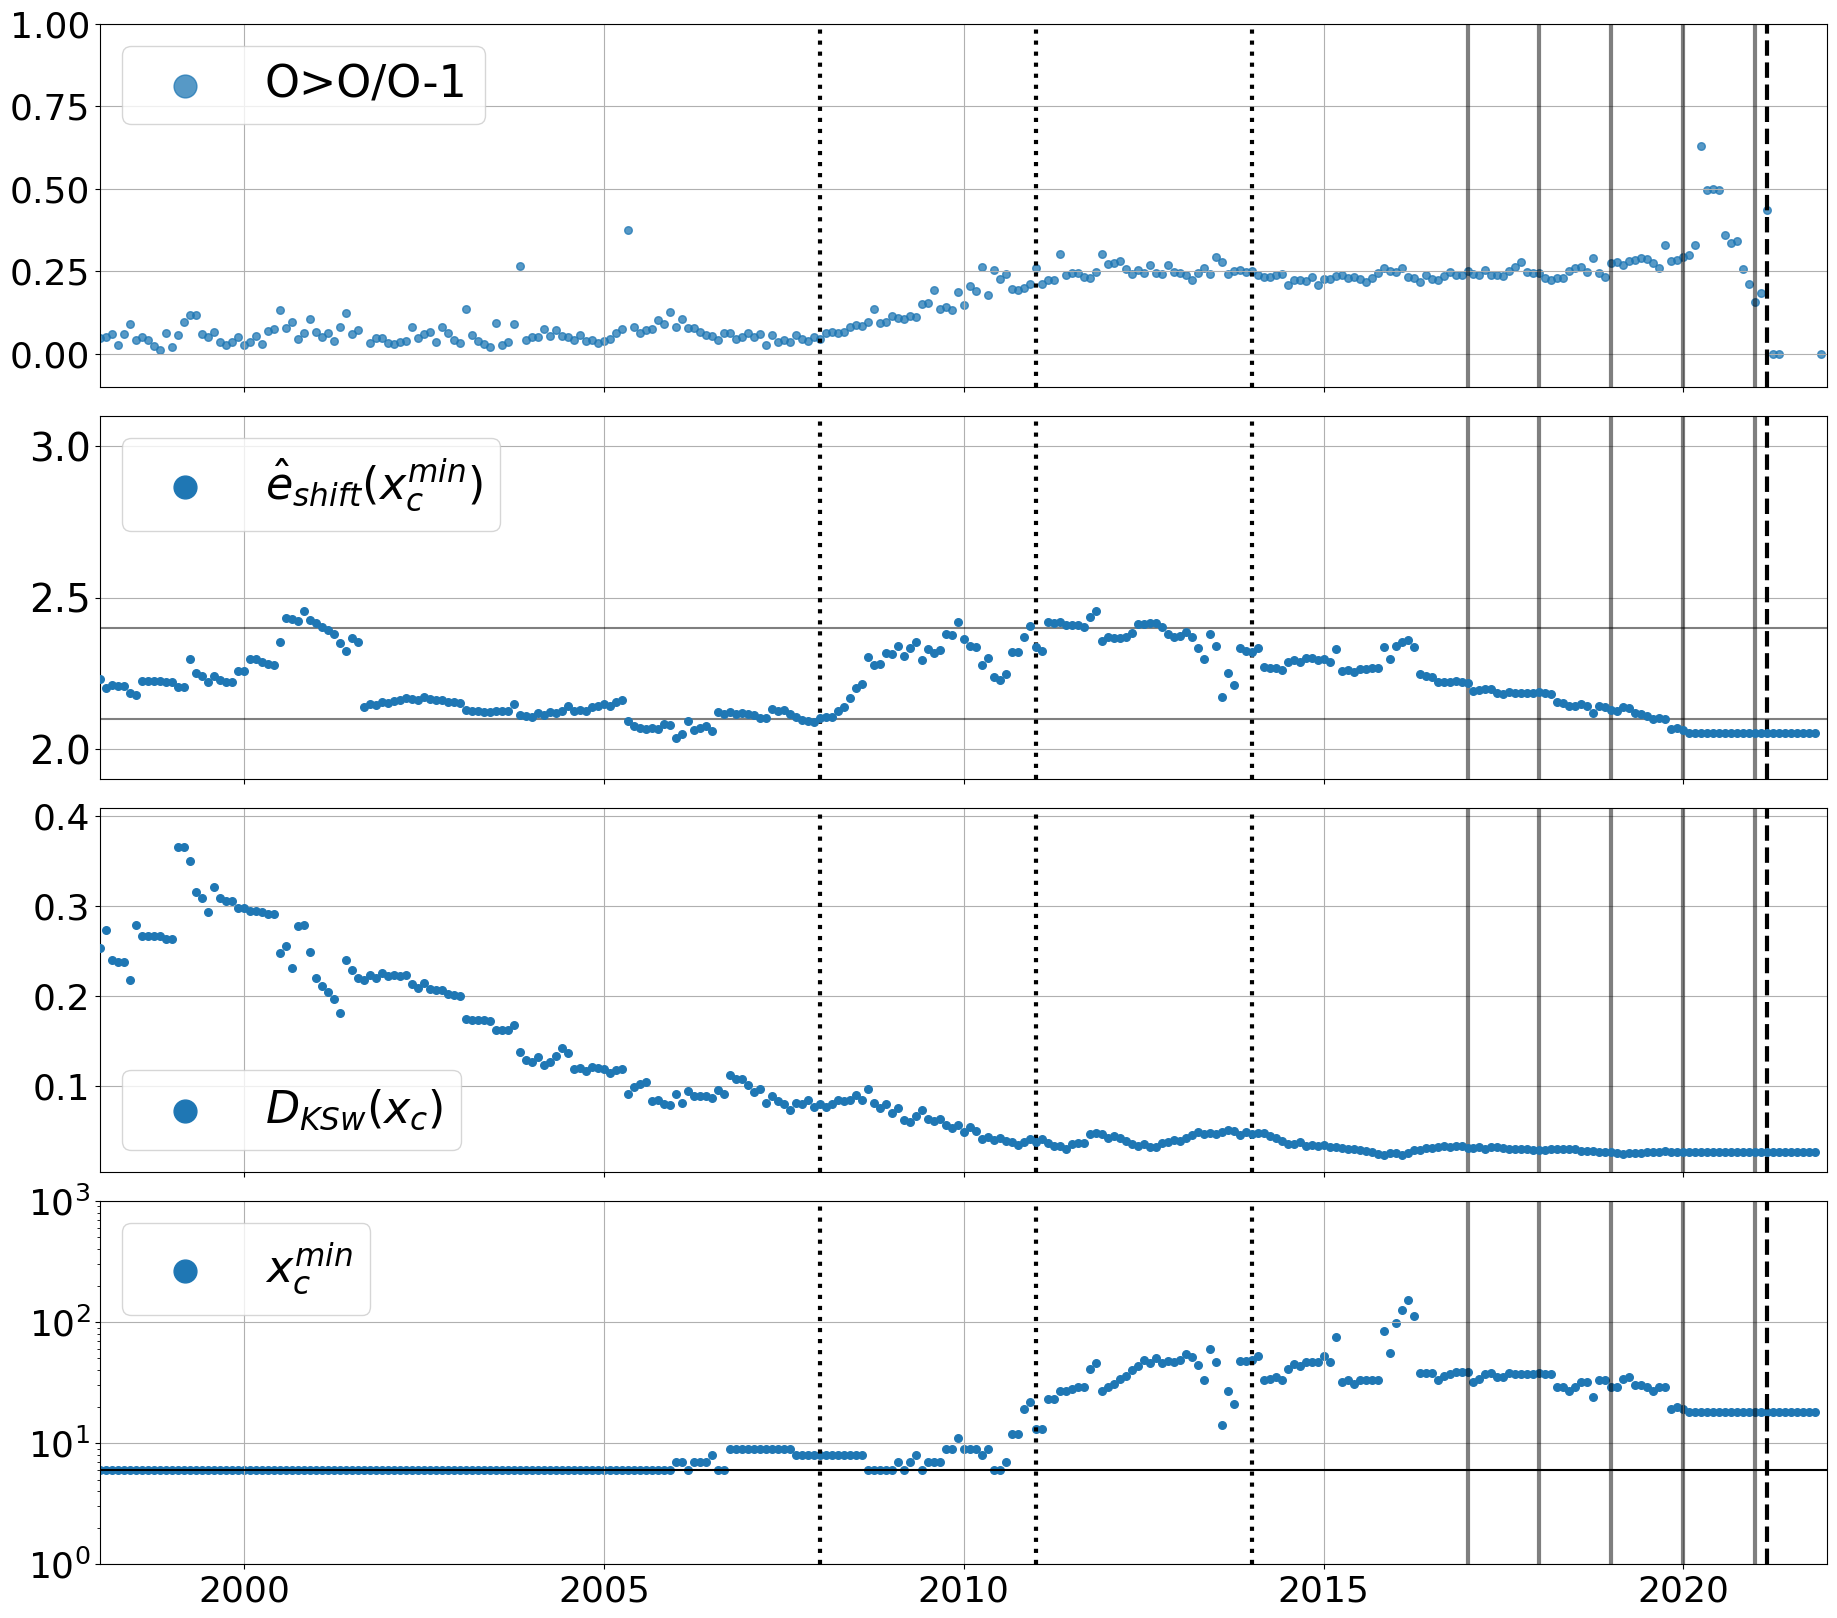

In [23]:
if DisplayStat:
    print("weightedKS",WKS,"XCmin>=",XCmin)
    print("RemoveSelfLoop",RemoveSelfLoop)
    print("InheritancePath",InheritancePath)
    filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_Month_1980_2025_20241008."+WKS+"_"+str(XCmin)+"_SL_"+str(RemoveSelfLoop)+".ehat.pkl"
    xdate,x_min,e_x_min,D_max,Nnodes,Nedges=pickle.load(open(filename,"rb"))    
    filename=exportpath+"stat_nodes_edges_O-O_"+InheritancePath+"_ORI_1970_2030_20241008.pkl"
    stat=pickle.load(open(filename,"rb"))
    # displaying all curves
    x=np.arange(1634)/12+1970

  
    
    def verticalline(fig,axs):
        alpha=0.5
        lw=3
        for year in range(2017,2022):
            axs.axvline(x=year,color='k',alpha=alpha,lw=lw)
        axs.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
        for year in [2008,2011,2014]:
            axs.axvline(x=year,color='k',linestyle=':',alpha=1,lw=lw)
        
        xticklabels=axs.get_xticklabels()
        for i, label in enumerate(xticklabels):
            if i == 0:  
                label.set_horizontalalignment('left')
            elif i == len(xticklabels) - 1:  
                label.set_horizontalalignment('right')
            else:  
                label.set_horizontalalignment('center')
    nfig=4
    
    fontsize=28
        
    
    fig, axs = plt.subplots(nfig,figsize=(18,4*nfig),sharex=True)   
    plt.tight_layout()
    
    for i in range(nfig):
        axs[i].set_xlim(1998,2022)
        axs[i].grid()

    # new O>O/ New O per month
    axsindex=0
    for key,value in stat.items():
        if np.sum(value[1:-1])!=0 and ">" in key:
            length=(len(key)-1)//2
            axs[axsindex].scatter(x,value/stat[key[-length:]]-1,s=30,label=key+"/"+key[-length:]+"-1",alpha=0.75)
    axs[axsindex].set_ylim(-0.1,1) # attention un point à 0.5 à la date de dump exclu pour la lisibilité
    axs[axsindex].tick_params(axis='both',which='major',labelsize=fontsize-2)
    axs[axsindex].legend(loc='best',fontsize=fontsize+4,ncol=2,markerscale=3)
    verticalline(fig,axs[axsindex])

    # hat(alpha)
    axsindex=1
    axs[axsindex].scatter(xdate,e_x_min,s=30,zorder=10,label=r'$\hat{e}_{shift}(x_c^{min})$')
    axs[axsindex].legend(loc='best',fontsize=fontsize+4,ncol=1,markerscale=3)
    axs[axsindex].set_ylim(1.9,3.1)
    axs[axsindex].axhline(y=2.1,ls="-",color="k",alpha=0.5)
    axs[axsindex].axhline(y=2.4,ls="-",color="k",alpha=0.5)
    axs[axsindex].tick_params(axis='both',which='major',labelsize=fontsize)
    verticalline(fig,axs[axsindex])
    
    # D_{KS}
    Dname={
        "KS":r'$D_{KS}(x_c)$',
        "weightedKS":r'$D_{KSw}(x_c)$',
        "Kuiper":r'$D_{KU}(x_c)$'
    }
    try:
        name=Dname[WKS]
    except:
        name="D_{unknown}"
        print("WARNING unknown distance in Plot_Figure_Degree")
    axsindex=2
    axs[axsindex].scatter(xdate,D_max,s=30,zorder=10,label=name)
    axs[axsindex].legend(loc='best',fontsize=fontsize+4,ncol=2,markerscale=3)
    axs[axsindex].tick_params(axis='both',which='major',labelsize=fontsize-2)
    verticalline(fig,axs[axsindex])
    
    # X_c^{min} 
    axsindex=3
    axs[axsindex].scatter(xdate,x_min,s=30,label=r'$x_c^{min}$')
    axs[axsindex].set_ylim(1,1e3) # attention un point à 0.5 à la date de dump exclu pour la lisibilité
    axs[axsindex].set_yscale("log") 
    axs[axsindex].tick_params(axis='both',which='major',labelsize=fontsize-2)
    axs[axsindex].legend(loc='best',fontsize=fontsize+4,ncol=2,markerscale=3)
    axs[axsindex].axhline(y=XCmin,color="k")
    verticalline(fig,axs[axsindex])

    plt.show()

**Comment**: 
At this stage, the obtained distributions and the exponent measurements under the assumption of a scale-invariant regime are of higher quality. They align with the hypothesis of regime changes induced by shifts in evolution rules.

If we had stronger evidence supporting the existence of this scale-invariant regime, it would be relevant to examine in more detail whether, for instance, the rule change characterized by a linear growth in the average number of new nodes starting in 2008 is consistent with the observed change in the measured exponent beginning in 2009.

However, as previously discussed, several factors may invalidate the hypothesis of a scale-invariant regime. These include edge inheritance caused by the chosen partitioning, the difficulty in characterizing the evolution of the average number of new edges per new node starting in 2011/2012, and the likely existence of an aging phenomenon—even though the edge age $\Delta TS$ distributions do not highlight it at this stage.

This suggests conducting:  
- An investigation into the influence of the default inheritance rule (addressed in the next section of this SM).  
- A topological partitioning of the nodes in the graph $O-(RV/RL)-O$, similar to the approach used for the $RV-RV$ subgraph, to assess whether such a method can reveal subtypes within the derived graph and thereby support further discussion on the evolution rules governing this network (addressed in the next SM).



## c) Derived graph without inheritance ($L0$ rule)

As previously mentioned, the default rule favors edge inheritance, as it does not take into account whether the path between two origins traverses $RV$ or $RL$ nodes that, under the chosen partitioning, are attributed to a third origin. The key question is whether modifying this rule—by excluding origin pairs that are not directly connected—would alter the regimes observed under the default ($BigO$) edge inheritance rule.


### Main statistics


In [28]:
Inheritance=False
if Inheritance:
    InheritancePath="BigO"
    print("derived graph with edge inheritance")
else:
    print("derived graph without edge inheritance")
    InheritancePath="L0"

nodes_O,edges_O,nodesad_O,d,Nnodes_O,Nedges_O,EPOCH,DatasetName=LoadAllArray_OO(keypath=InheritancePath)
statsoutput=DisplayTypeStats(nodes_O,edges_O,d)    

derived graph without edge inheritance
Loaded : nodes_o_derived_O-RVRL-O_L0_20240429.pkl
Loaded : edges_o_derived_O-RVRL-O_L0_20240429.pkl
Loaded : nodesadderived_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : ./ImportData/d_o_derived_O-RVRL-O_BigO_20240429.pkl
DatasetName SWH derived O-[RV/RL]-O
DatasetDescription Zenodo Deposit 10.5281/zenodo.15260640
DatasetDoi 10.5281/zenodo.15260640
From EPOCH 1970-01-01
GetNodesTypesArray [Elapse time : 1.0 (s)]
___ O     :     139,524,533 (100.0%)
____________________________________
___ Total :     139,524,533 (100.0%)

GetEdgesTypesArray [Elapse time : 1.0 (s)]
___ O>O   :     149,732,521 (100.0%)
____________________________________
___ Total :     149,732,521 (100.0%)



In [36]:
Inheritance=False
InheritancePath="L0"
print("Derived graph without edge inheritance")
DisplayStat=True

Derived graph without edge inheritance


LOAD  ./ExportData/stat_nodes_edges_O-O_L0_ORI_1970_2030_20241008.pkl


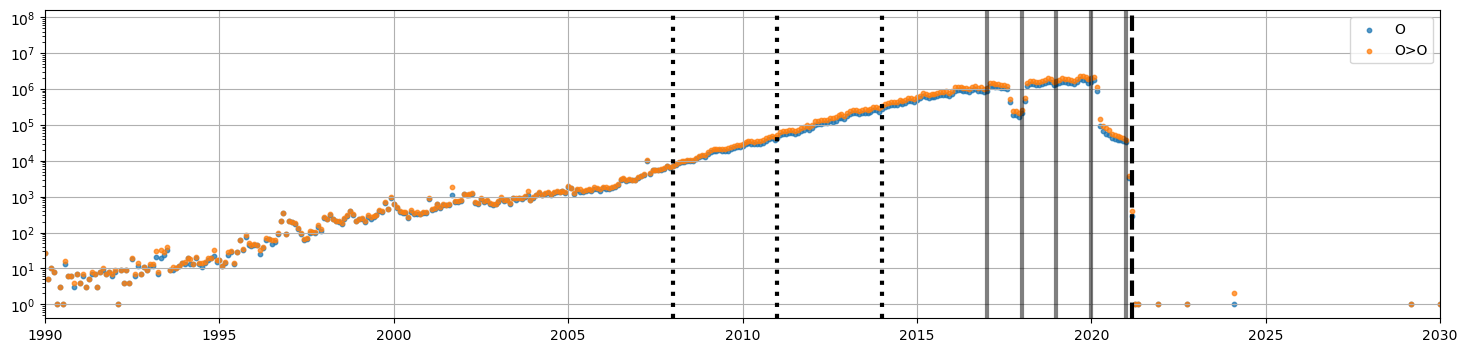

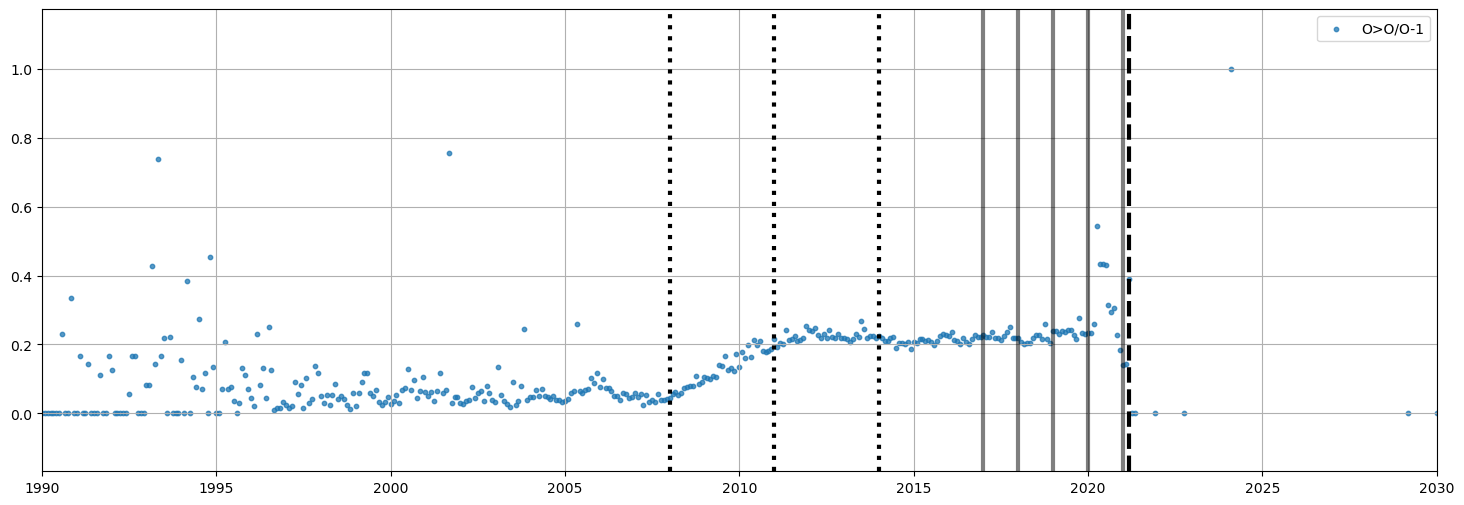

In [29]:
if DisplayStat:
    filename=exportpath+"stat_nodes_edges_O-O_"+InheritancePath+"_ORI_1970_2030_20241008.pkl"
    print("LOAD ",filename)
    stat=pickle.load(open(filename,"rb"))
    # displaying all curves
    x=np.arange(1634)/12+1970
    def VerticalLinesLocal():
        lw=3;alpha=0.5
        plt.xlim(1990,2030)
        for year in range(2017,2022):
            plt.axvline(x=year,color='k',alpha=alpha,lw=lw)
        plt.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
        for year in [2008,2011,2014]:
            plt.axvline(x=year,color='k',linestyle=':',alpha=1,lw=lw)
        plt.grid()
        plt.legend()
            
    plt.figure(figsize=(18,4))
    for key,value in stat.items():
        if np.sum(value[1:-1])!=0:
            plt.scatter(x,value,s=10,label=key,alpha=0.75)
    plt.yscale('log')
    VerticalLinesLocal()
    plt.show()
    
    plt.figure(figsize=(18,6))
    for key,value in stat.items():
        if np.sum(value[1:-1])!=0 and ">" in key:
            length=(len(key)-1)//2
            plt.scatter(x,value/stat[key[-length:]]-1,s=10,label=key+"/"+key[-length:]+"-1",alpha=0.75)
    VerticalLinesLocal()
    #plt.yscale('log')
    plt.show()

### Edge creation rate with and without inheritance

We now compare the average number of new edge per new node,  with and without inheritance.

LOAD  ./ExportData/stat_nodes_edges_O-O_BigO_ORI_1970_2030_20241008.pkl
LOAD  ./ExportData/stat_nodes_edges_O-O_L0_ORI_1970_2030_20241008.pkl


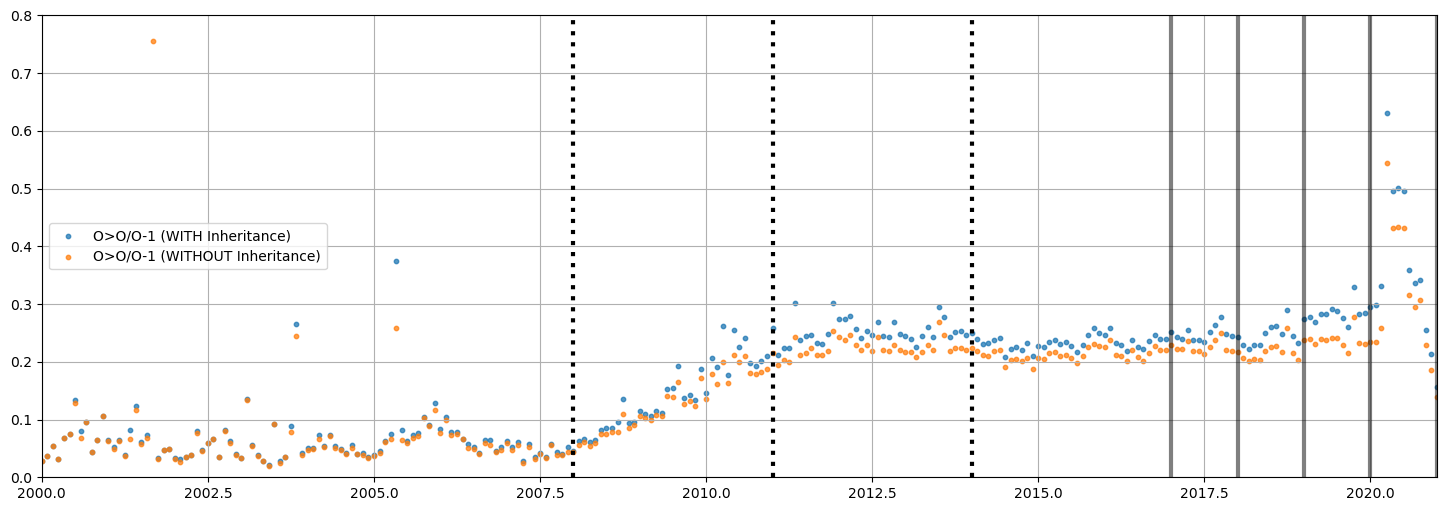

In [30]:
if DisplayStat:
    def VerticalLinesLocal():
        lw=3;alpha=0.5
        plt.xlim(1990,2030)
        for year in range(2017,2022):
            plt.axvline(x=year,color='k',alpha=alpha,lw=lw)
        plt.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
        for year in [2008,2011,2014]:
            plt.axvline(x=year,color='k',linestyle=':',alpha=1,lw=lw)
        plt.grid()
        plt.legend()

    plt.figure(figsize=(18,6))
    x=np.arange(1634)/12+1970

    for InheritancePath,label in [("BigO"," (WITH Inheritance)"),("L0"," (WITHOUT Inheritance)")]:
        filename=exportpath+"stat_nodes_edges_O-O_"+InheritancePath+"_ORI_1970_2030_20241008.pkl"
        print("LOAD ",filename)
        stat=pickle.load(open(filename,"rb"))
        # displaying all curves
        for key,value in stat.items():
            if np.sum(value[1:-1])!=0 and ">" in key:
                length=(len(key)-1)//2
                plt.scatter(x,value/stat[key[-length:]]-1,s=10,label=key+"/"+key[-length:]+"-1"+label,alpha=0.75)
    VerticalLinesLocal()
    #plt.yscale('log')
    plt.xlim(2000,2021)
    plt.ylim(0,0.8)
    plt.show()


**Comment**:  
Removing the default inheritance rule used to build the derived $O-(RV/RL)-O$ graph modifies the average number of new edges per new node, which is—unsurprisingly—lower than that observed with the default inheritance rule. However, based on the previous figure, it is difficult to conclude whether a significant regime change occurs when comparing the two rules (except possibly after 2018, see related discussion in SM11).

The conclusion, therefore, is that the observed regime change—namely the increase in the average edge creation rate between 2008-2011/12—is not induced by the inheritance mechanism used in the default rule. This supports the idea that this regime change is a robust and intrinsic property of the real-world growing network under study.
